In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('placement.csv')
df

cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]

In [3]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160,)


In [5]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [6]:
y_pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))

r2 score: 0.780730147510384


In [7]:
print("Coefficient (m):", lr.coef_)
print("Intercept(b):", lr.intercept_)

Coefficient (m): [0.55795197]
Intercept(b): -0.8961119222429144


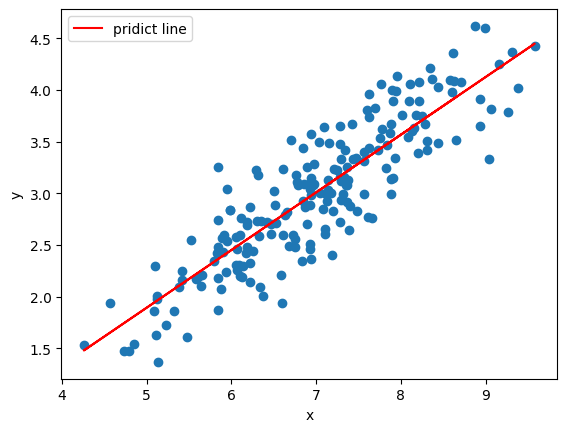

In [8]:
y_pred=lr.predict(x_train)
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,y_pred,color='red',label='pridict line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

After scratch

In [9]:
class LR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train.iloc[i] - X_train.mean())*(y_train.iloc[i] - y_train.mean()))
            den = den + ((X_train.iloc[i] - X_train.mean())*(X_train.iloc[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b


In [10]:
lr2=LR()
lr2.fit(x_train,y_train)

cgpa    0.557952
dtype: float64
cgpa   -0.896112
dtype: float64


In [11]:
y_pred2 = lr2.predict(x_test)
print("r2_score:", r2_score(y_test, y_pred2))

     cgpa
112  8.58
29   7.15
182  5.88
199  6.22
193  4.57
85   4.79
10   5.32
54   6.86
115  8.35
35   6.87
12   8.94
92   7.90
13   6.93
126  5.91
174  7.32
2    7.82
44   5.09
3    7.42
113  6.94
14   7.73
23   6.19
25   7.28
6    6.73
134  7.20
165  8.21
173  6.75
45   7.87
65   7.60
48   8.63
122  5.12
178  8.15
64   7.36
9    8.31
57   6.60
78   6.59
71   7.47
128  7.93
176  6.29
131  6.37
53   6.47
r2_score: 0.7807301475103842


In [13]:
print("coefficient(m):",lr2.m)
print("intercept(b):",lr2.b)

coefficient(m): cgpa    0.557952
dtype: float64
intercept(b): cgpa   -0.896112
dtype: float64
